**Hello World Example**

_This notebook is partly based on Chapter 3 of Aurelien Geron: Hand-on Machine Learning with Scikit-learn & Tensorflow._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

 
import matplotlib
import matplotlib.pyplot as plt

 

A couple utility functions to plot grayscale and RGB images:

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

# Import the Keras API from Tensorflow

In [3]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D , Dropout , BatchNormalization  

# from tensorflow.keras import backend as K

# MNIST

MNIST is the hello world example of machine learning. scikit-learn can load the data directly from https://www.openml.org

In [4]:
import math
from sklearn.datasets import fetch_openml

X,y = fetch_openml('mnist_784',version=1,cache=True,return_X_y=True)

# Use the notion of y=f(X)
y = y.astype(int)
print('Data size: {0} x {1} and label size {2}'.format(X.shape[0],X.shape[1],y.shape[0]))
print('The images are of size: {0} x {0}'.format(math.sqrt(X.shape[1])))

Data size: 70000 x 784 and label size 70000
The images are of size: 28.0 x 28.0


# Test and Training Data
Let's split into training images and test images.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, stratify=y, random_state=42)


# shuffle_index = np.random.permutation(70000)
# reshuffle the data and use 60000 samples as training and 10000 as test
# X_train, X_test, y_train, y_test = X[shuffle_index[:60000],:], X[shuffle_index[60000:],:], y[shuffle_index[:60000]], y[shuffle_index[60000:]]


X_train = X_train.to_numpy( )
X_test  = X_test.to_numpy(  )



# reshape into images
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

print('Matrix shape X: ', X_train.shape)
print('{0} samples for training'.format(X_train.shape[0]))
print('{0} samples for testing'.format(X_test.shape[0]))

Matrix shape X:  (56000, 28, 28, 1)
56000 samples for training
14000 samples for testing


Plot an image as sanity check.

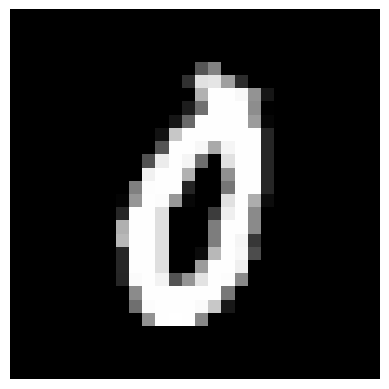

In [6]:
plot_image(X_train[15000,:,:,0])

# print('Number: ', y_train[15000])

# CNN Model
 

In [7]:


model = Sequential() 



model.add( Conv2D( 11 , kernel_size=( 5 ,5 ), activation='relu', padding='same', input_shape=( 28 , 28 , 1 ) ))

model.add( Conv2D( 9 , kernel_size=( 3 ,3), activation='relu', strides= (1,1), padding='valid'  ))
model.add ( BatchNormalization() ) 

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add( Conv2D( 5 , kernel_size=( 3 ,3), activation='relu',   padding='valid'  ))
  
model.add( Dropout( 0.5 ) )
 
model.add(Flatten())

model.add(Dense(20, activation='relu'))
model.add(Dense( 10, activation='softmax'))



sgd = tensorflow.keras.optimizers.SGD( lr= 0.0005 )

model.compile(loss='categorical_crossentropy',    
              optimizer=sgd,  
              metrics=['accuracy'])



In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 11)        286       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 9)         900       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 9)        36        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 9)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 5)         410       
                                                                 
 dropout (Dropout)           (None, 11, 11, 5)         0

### Turn the numbers into one-hot vectors

In [9]:
nClasses = 10

# Use Keras' handy utils
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes= nClasses )
y_test_k = tensorflow.keras.utils.to_categorical(y_test, num_classes=nClasses )



In [10]:


y_train = np.array ( y_train)
y_test =  np.array ( y_test)



See if it worked

In [11]:
for i in range(0,200,20):
    print(y_train[i], " ", y_train_k[i,:])


0   [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
7   [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
8   [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
9   [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
7   [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
5   [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
3   [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
9   [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9   [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
6   [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# MNIST Training

In [12]:
batchSize = 32         #  train  56,000/32 >>>>1750 batches
nEpochs = 20

history = model.fit( X_train, y_train_k, batch_size=batchSize, epochs=nEpochs , verbose=1, 
                    validation_data=(X_test, y_test_k )    )


Epoch 1/20
1750/1750 [==============================] - 26s 14ms/step - loss: 0.4927 - accuracy: 0.8422 - val_loss: 0.1356 - val_accuracy: 0.9601
Epoch 2/20
1750/1750 [==============================] - 24s 14ms/step - loss: 0.1740 - accuracy: 0.9461 - val_loss: 0.0974 - val_accuracy: 0.9705
Epoch 3/20
1750/1750 [==============================] - 24s 14ms/step - loss: 0.1355 - accuracy: 0.9576 - val_loss: 0.0805 - val_accuracy: 0.9761
Epoch 4/20
1750/1750 [==============================] - 24s 14ms/step - loss: 0.1166 - accuracy: 0.9632 - val_loss: 0.0739 - val_accuracy: 0.9768
Epoch 5/20
1750/1750 [==============================] - 24s 14ms/step - loss: 0.1048 - accuracy: 0.9673 - val_loss: 0.0754 - val_accuracy: 0.9777
Epoch 6/20
1750/1750 [==============================] - 24s 14ms/step - loss: 0.0966 - accuracy: 0.9701 - val_loss: 0.0597 - val_accuracy: 0.9823
Epoch 7/20
1750/1750 [==============================] - 24s 14ms/step - loss: 0.0903 - accuracy: 0.9724 - val_loss: 0.0643 -

In [13]:


y_predict = model.predict(X_test.astype(float))



438/438 [==============================] - 2s 4ms/step


In [14]:


print( y_predict[0] )

x  =  y_predict[0] 

print( np.argmax(x ) )


[1.2569029e-07 5.8433628e-08 2.3828898e-06 6.5198187e-06 1.2100573e-09
 2.0174171e-09 3.4226860e-14 9.9999070e-01 2.1757383e-09 6.3070203e-08]
7


In [15]:
from sklearn.metrics import classification_report
import seaborn as sns 

from sklearn.metrics import confusion_matrix

def drawing_conf_matrix(  y_actual , y_predict ):
    
    print( "Classification Report" )
    print ( classification_report(  y_actual , y_predict  )  )  # to represent accuacy, precision, recall and f1 score

    conf_mat = confusion_matrix( y_actual,   y_predict )   # to represent confusion matrix ( TP , FP , FN , FN )
    
    print( "Confusion Matrix")
    print( conf_mat )
    sns.heatmap( conf_mat , annot= True  , fmt = "" )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
    
    

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1381
           1       1.00      0.99      0.99      1575
           2       0.99      0.99      0.99      1398
           3       0.99      0.99      0.99      1428
           4       0.99      0.98      0.99      1365
           5       0.99      0.99      0.99      1263
           6       0.99      0.99      0.99      1375
           7       0.99      0.99      0.99      1459
           8       0.99      0.99      0.99      1365
           9       0.97      0.99      0.98      1391

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000

Confusion Matrix
[[1373    0    0    0    0    0    1    0    6    1]
 [   0 1559    6    1    2    0    1    6    0    0]
 [   2    0 1381    2    1    0    1    5    4    2]
 [   1    0    1 1412    1    6    0    4  

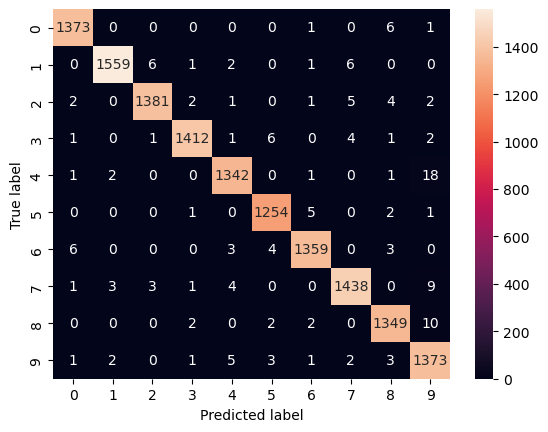

In [16]:


drawing_conf_matrix(  y_test, np.argmax(y_predict,axis=1)  )
    
    

# Training History Visualization 

**Accuracy**
Source: Keras manual

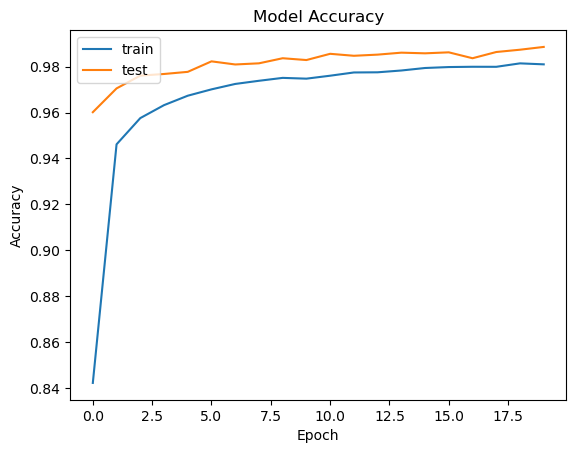

In [17]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
 


**Loss**
Source: Keras manual

In [18]:
history.history.keys()
'val_' + k




'val_accuracy'

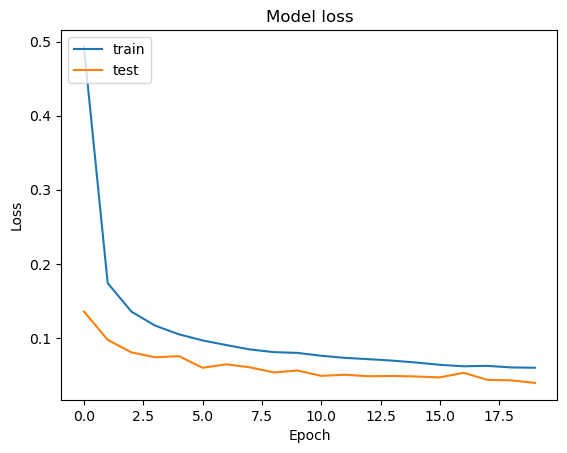

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

